<a href="https://colab.research.google.com/github/samueljos3/Validacao-de-modelos-/blob/main/DiabetesValida%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando dados

In [ ]:
import pandas as pd

In [ ]:
# A base de dados já estava tratada
df = pd.read_csv("/content/diabetes.csv")
df

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [ ]:
df.describe()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,70.654822,29.106599,155.548223,32.988579,0.525543,0.329949
std,12.469919,10.504273,118.775855,7.210160,0.350127,0.470792
min,24.000000,7.000000,14.000000,0.000000,0.085000,0.000000
25%,62.000000,21.000000,76.250000,28.325000,0.270250,0.000000
50%,70.000000,29.000000,125.000000,33.200000,0.449500,0.000000
75%,78.000000,36.750000,190.000000,37.075000,0.687000,1.000000
max,110.000000,63.000000,846.000000,67.100000,2.420000,1.000000


#Criação do modelo

In [ ]:
x = df.drop("diabetes", axis = 1)
y = df["diabetes"]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth =  10)

# testando com os dados de treino
modelo.fit(x, y)
print("A acurácia utilizando a base de treino é: ", modelo.score(x, y))

A acurácia utilizando a base de treino é:  0.9111675126903553


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.10, shuffle = True, stratify = y, random_state = 1)
modelo.fit(x_treinamento, y_treinamento)
previsoes = modelo.predict(x_teste)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
acuracia = accuracy_score(y_teste, previsoes)

# acurácia com dados de teste
print(f'Acurácia do modelo: {acuracia:.2f}')


Acurácia do modelo: 0.75


# Validando o modelo

## Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

previsoes = modelo.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste, previsoes)

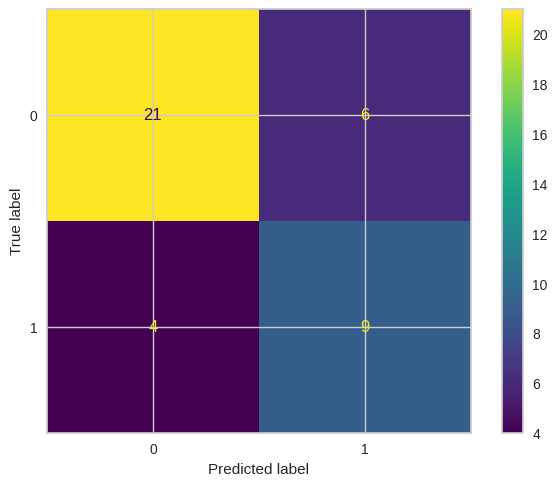

In [ ]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot()

## Classification Report

In [ ]:
from sklearn.metrics import *

In [ ]:
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.60      0.69      0.64        13

    accuracy                           0.75        40
   macro avg       0.72      0.74      0.73        40
weighted avg       0.76      0.75      0.75        40



## Curva ROC

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

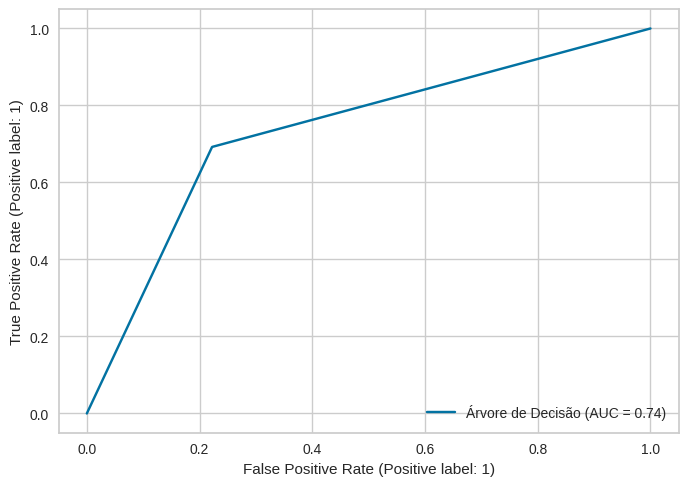

In [ ]:
RocCurveDisplay.from_predictions(y_teste, previsoes, name = "Árvore de Decisão")

In [ ]:
print("AUC: ", roc_auc_score(y_teste, previsoes))

AUC:  0.735042735042735


## Curva de precisão x Recall

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

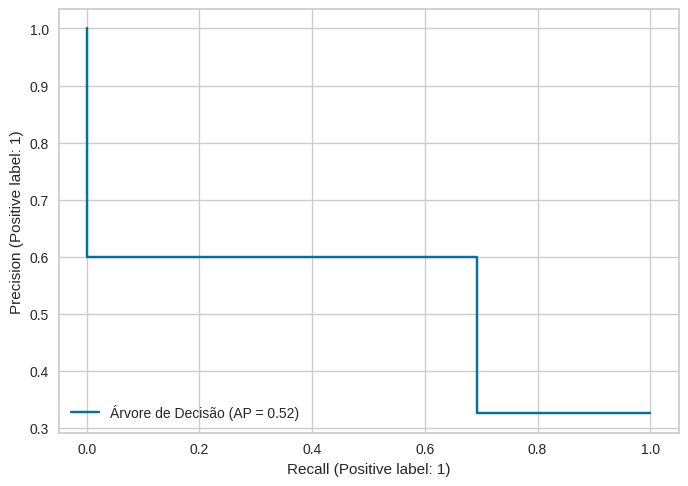

In [ ]:
PrecisionRecallDisplay.from_predictions(y_teste, previsoes, name = "Árvore de Decisão")

In [ ]:
print("AP: ", average_precision_score(y_teste, previsoes))

AP:  0.5153846153846153


## Validação cruzada KFold

In [ ]:
from sklearn.model_selection import cross_validate, KFold

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.00848794, 0.00338554, 0.00328469, 0.00340199, 0.00358105]),
 'score_time': array([0.0021162 , 0.00184703, 0.00179172, 0.00207996, 0.00192547]),
 'test_score': array([0.70886076, 0.65822785, 0.62025316, 0.67088608, 0.64102564])}

In [ ]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()

print(f'média: {media}')
print(f'desvio_padrao: {desvio_padrao}')
print(f'Intervalor de confiança: {media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}')

média: 0.6598506978253813
desvio_padrao: 0.029828666617041307
Intervalor de confiança: 0.6001933645912987, 0.7195080310594639


## Validação cruzada com Recall

In [ ]:
def intervalo_conf(resultados):
  media = resultados['test_score'].mean()
  desvio_padrao = resultados['test_score'].std()

  print(f'média: {media}')
  print(f'desvio_padrao: {desvio_padrao}')
  print(f'Intervalor de confiança: {media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}')


In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.00681305, 0.0039916 , 0.0054605 , 0.00455141, 0.00324774]),
 'score_time': array([0.004287  , 0.00388789, 0.00425005, 0.00275779, 0.00269842]),
 'test_score': array([0.52      , 0.6       , 0.5       , 0.5       , 0.41666667])}

In [ ]:
intervalo_conf(cv_resultados)

média: 0.5073333333333333
desvio_padrao: 0.05843895200216299
Intervalor de confiança: 0.39045542932900734, 0.6242112373376593


## Extratificação dos dados

In [ ]:
df['diabetes'].value_counts(normalize = True)

0    0.670051
1    0.329949
Name: diabetes, dtype: float64

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring = 'recall')

In [ ]:
intervalo_conf(cv_resultados)

média: 0.5
desvio_padrao: 0.0543928293220421
Intervalor de confiança: 0.3912143413559158, 0.6087856586440842


# Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)
y_balanceado.value_counts(normalize = True)

0    0.5
1    0.5
Name: diabetes, dtype: float64

In [ ]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv = skf, scoring = 'recall')

In [ ]:
intervalo_conf(cv_resultados)

média: 0.7613207547169811
desvio_padrao: 0.02855235084985203
Intervalor de confiança: 0.7042160530172771, 0.8184254564166852


## Pipeline para validação

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
pipeline = imbpipeline([('oversample', SMOTE()), ('árvore', modelo)])

In [ ]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [ ]:
intervalo_conf(cv_resultados)

média: 0.5615384615384615
desvio_padrao: 0.07919715493066924
Intervalor de confiança: 0.40314415167712303, 0.7199327713998


# Undersampling

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
pipeline = imbpipeline([('oversample', NearMiss(version = 3)), ('árvore', modelo)])

In [ ]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [ ]:
intervalo_conf(cv_resultados)

média: 0.6923076923076923
desvio_padrao: 0.07692307692307693
Intervalor de confiança: 0.5384615384615384, 0.8461538461538461


# Mais informações do modelo com Undersampling

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.71      0.92      0.80        13

    accuracy                           0.85        40
   macro avg       0.83      0.87      0.84        40
weighted avg       0.88      0.85      0.85        40



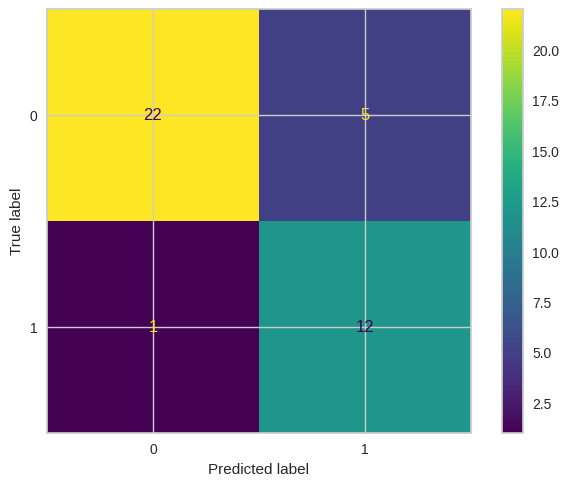

In [ ]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo.fit(x_balanceado, y_balanceado)
previsoes = modelo.predict(x_teste)

print(classification_report(y_teste, previsoes))
ConfusionMatrixDisplay.from_predictions(y_teste, previsoes)